<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

### Problem Statement : Based on given dataset segment the customers on basis of Age, Income and Spending

In [1]:
%pip install yellowbrick plotly nbformat

### Step 1: Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: Perfom basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3: Seperate X data

In [6]:
X = df[['Age', 'Income', 'Spending']]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 4: Apply preprocessing on X

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [9]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step 5: optimize number of clusters with yellowbrick package

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

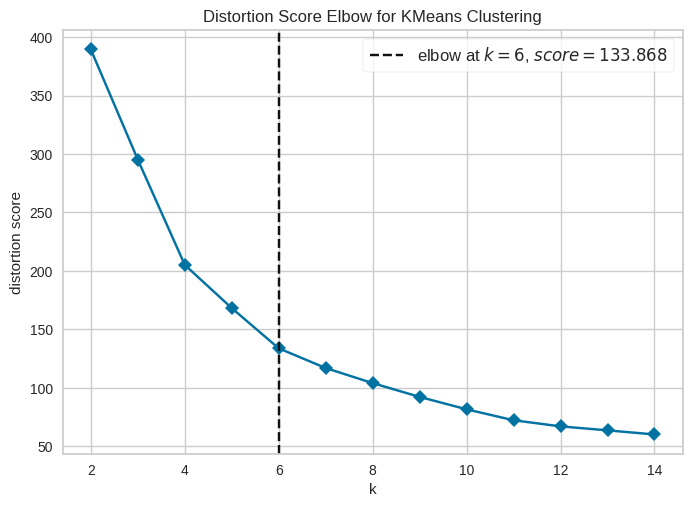

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
visualizer = kelbow_visualizer(KMeans(),
                                X_pre,
                                k=(2, 15),
                                timings=False)
visualizer.show()

### 6 : Create a final model with 6 clusters from elbow method

In [19]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(X_pre)

In [20]:
clusters

array([1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1,
       5, 1, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [21]:
X['Cluster'] = clusters

In [22]:
X.head()

,Age,Income,Spending,Cluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,5
3,23,16,77,1
4,31,17,40,5


In [23]:
X[X['Cluster']==0]

,Age,Income,Spending,Cluster
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0
69,32,48,47,0


In [24]:
for i in range(6):
  print(f'Cluster number {i} :\n')
  display(X[X['Cluster']==i])
  print('\n======================================================\n')

Cluster number 0 :



,Age,Income,Spending,Cluster
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0
69,32,48,47,0




Cluster number 1 :



,Age,Income,Spending,Cluster
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1




Cluster number 2 :



,Age,Income,Spending,Cluster
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number 3 :



,Age,Income,Spending,Cluster
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3




Cluster number 4 :



,Age,Income,Spending,Cluster
40,65,38,35,4
46,50,40,55,4
50,49,42,52,4
53,59,43,60,4
54,50,43,45,4
55,47,43,41,4
56,51,44,50,4
57,69,44,46,4
59,53,46,46,4
60,70,46,56,4




Cluster number 5 :



,Age,Income,Spending,Cluster
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5


### Centroids

In [25]:
cent = X.groupby(by='Cluster').mean()
cent

,Age,Income,Spending
Cluster,,,
0,26.684211,57.578947,47.789474
1,25.250000,25.833333,76.916667
2,32.692308,86.538462,82.128205
3,41.939394,88.939394,16.969697
4,56.333333,54.266667,49.066667
5,45.523810,26.285714,19.380952


### Plot the results in 3d scatterplot

In [27]:
import plotly.express as px

In [28]:
fig = px.scatter_3d(data_frame=X,
                    x='Age',
                    y='Income',
                    z='Spending',
                    color='Cluster')
fig.show()

### Save the dataframe to csv

In [29]:
X.to_csv('KMeansResults.csv', index=False)